In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)
# Make_blobs dataset for clustering.
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=6, random_state=42)
# Number of training examples and cluster centers.
m = X.shape[0] 
n = X.shape[1] 
n_iter = 50

In [2]:
# Shape of the dataset.
print(X.shape, y.shape)
print(m,n)

(300, 2) (300,)
300 2


In [3]:
# Inspect the dataset.
print(X[0:4])
y[0:4]

[[ -0.62301172   9.18886394]
 [-11.06689636  10.54195109]
 [ -2.30033403   7.054616  ]
 [  4.41641605   2.68717018]]


array([0, 5, 0, 1])

Text(0.5, 1.0, 'Original Dataset')

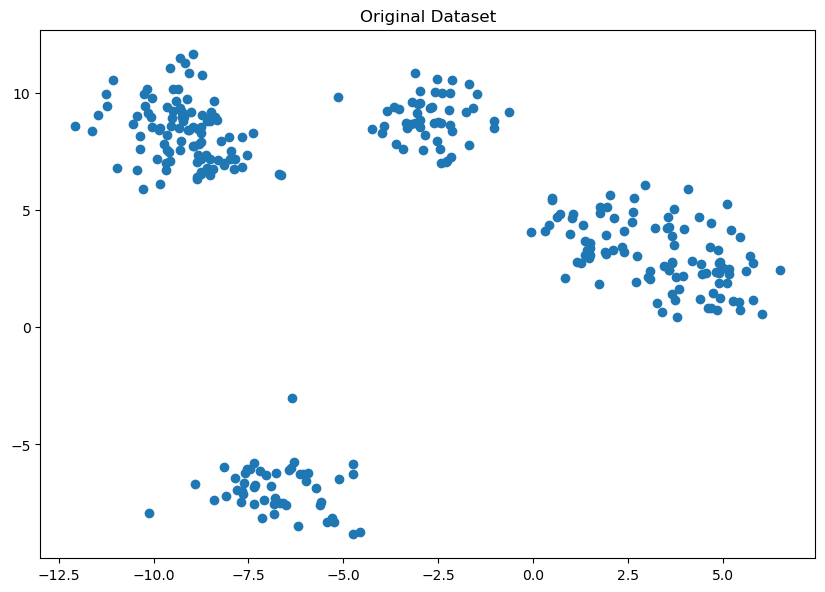

In [4]:
# Plot the clusters.
plt.figure(figsize=(10, 7), dpi=100)
plt.scatter(X[:,0],X[:,1])
plt.title('Original Dataset')

In [5]:
# Compute the initial centroids randomly.
import random
K=6
# Create an empty centroid array.
centroids = np.array([]).reshape(0,n) #shape = (0,2)
# Create 3 random centroids.
for k in range(K):
    centroids = np.r_[centroids, X[random.randint(0,m-1)].reshape(1,2)] #randint(0,249)

In [6]:
print(centroids[0:4])
centroids.shape

[[ 4.60516707  0.80449165]
 [ 3.98702537  4.19671511]
 [-9.24981371  8.98290913]
 [-2.44166942  7.58953794]]


(6, 2)

In [7]:
# Create an empty array.
euclid = np.array([]).reshape(m,0)
# Find distance between from each points to three centroids.
for k in range(K):
       dist = np.sum((X-centroids[k])**2, axis=1) # dist = (250,)
       euclid = np.c_[euclid, dist] 
# euclid = (250,3)
# Store the minimum value we have computed.
minimum = np.argmin(euclid, axis=1)+1
minimum

array([6, 3, 4, 2, 4, 2, 2, 3, 2, 3, 1, 4, 1, 4, 3, 4, 1, 1, 3, 4, 1, 2,
       4, 3, 2, 4, 3, 3, 2, 3, 2, 3, 3, 2, 5, 1, 2, 3, 3, 5, 1, 1, 5, 2,
       3, 2, 6, 5, 3, 5, 2, 3, 3, 2, 4, 2, 1, 1, 4, 5, 4, 2, 3, 3, 5, 1,
       3, 3, 3, 5, 2, 3, 2, 3, 2, 6, 3, 2, 3, 6, 5, 4, 4, 3, 4, 3, 3, 5,
       2, 3, 3, 3, 4, 3, 4, 6, 3, 2, 1, 3, 3, 2, 2, 5, 1, 6, 4, 5, 4, 1,
       3, 3, 5, 1, 6, 4, 4, 5, 4, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 6, 5, 1,
       1, 2, 6, 4, 6, 5, 5, 3, 4, 2, 4, 1, 2, 4, 3, 5, 5, 5, 2, 3, 3, 1,
       6, 3, 5, 2, 4, 5, 3, 2, 3, 1, 4, 3, 2, 3, 1, 3, 3, 1, 1, 2, 1, 1,
       3, 1, 5, 3, 3, 3, 1, 5, 3, 3, 4, 2, 5, 5, 3, 3, 4, 5, 5, 2, 2, 3,
       2, 5, 3, 3, 5, 1, 2, 4, 4, 3, 5, 6, 3, 2, 2, 3, 6, 1, 2, 3, 5, 3,
       2, 2, 3, 2, 3, 1, 2, 3, 3, 2, 2, 2, 5, 5, 2, 5, 2, 1, 3, 6, 2, 5,
       3, 3, 5, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 5, 6, 3, 1,
       1, 4, 2, 2, 3, 5, 2, 5, 5, 1, 4, 3, 5, 5, 3, 3, 2, 6, 1, 2, 5, 5,
       5, 3, 3, 5, 2, 5, 5, 2, 4, 3, 5, 6, 3, 4], d

In [8]:
def euclid_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))


In [9]:
def plot(m,X,label,centroids):
    plt.figure(figsize=(10, 7), dpi=100)
    color = ['red','green','blue','black','orange','yellow']
    for i in range(m):
        plt.scatter(X[i,0],X[i,1], color = color[label[i]])
    for k in range(K):
        plt.scatter(centroids[k,0],centroids[k,1], color = "purple")
    plt.show()

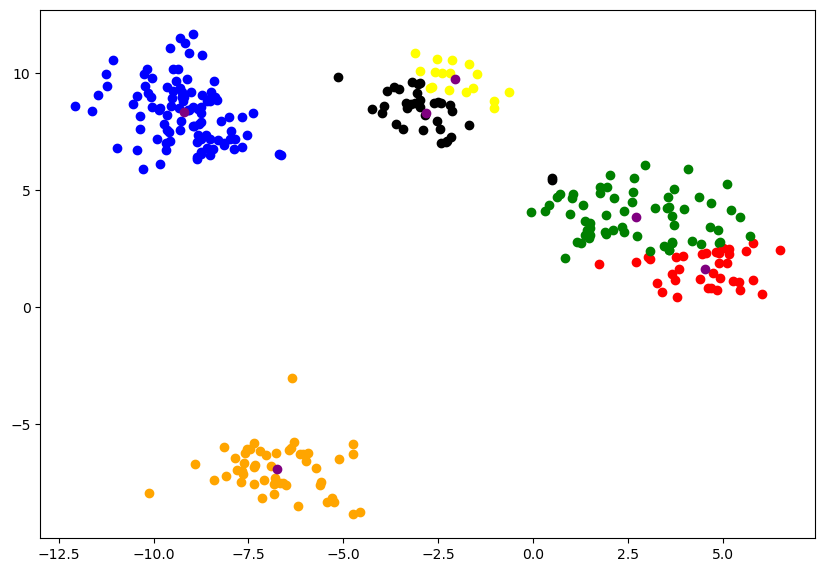

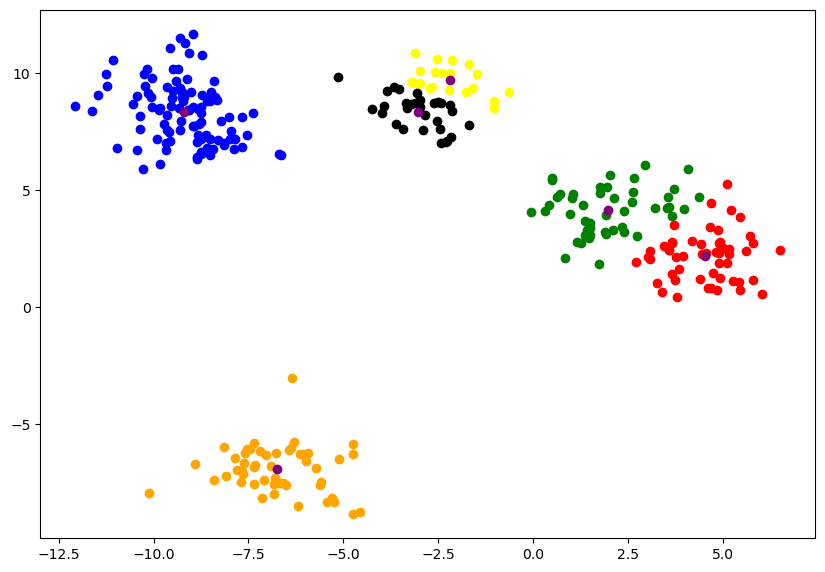

Converged in iteration 5


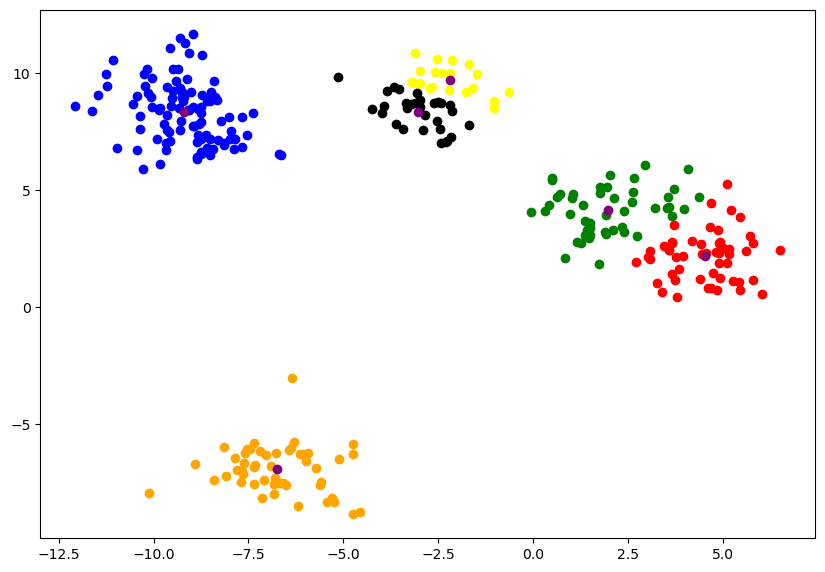

In [10]:
# Repeat the above steps 

for it in range(n_iter):
    label = []
    # Assign clusters to points.
    for i in range(m):
        distance = [euclid_distance(X[i],centroids[k]) for k in range(K)]
        min_index = np.argmin(distance)
        label.append(min_index)
    label = np.array(label)
    old_centroids = centroids.copy()
    # Compute mean and update.
    for k in range(K):
        k_index = np.where(label==k)[0]
        mean_centroid = np.mean(X[k_index],axis=0)
        centroids[k] = mean_centroid
    #plot graph in every 5 iterations
    if(it%4==0):
        plot(m,X,label,centroids)
    convergence = [np.abs(old_centroids-centroids) for k in range(K)]
    if(np.sum(convergence)<0.5):
        print(f"Converged in iteration {it}")
        plot(m,X,label,centroids)
        break

Text(0.5, 1.0, 'Original Dataset')

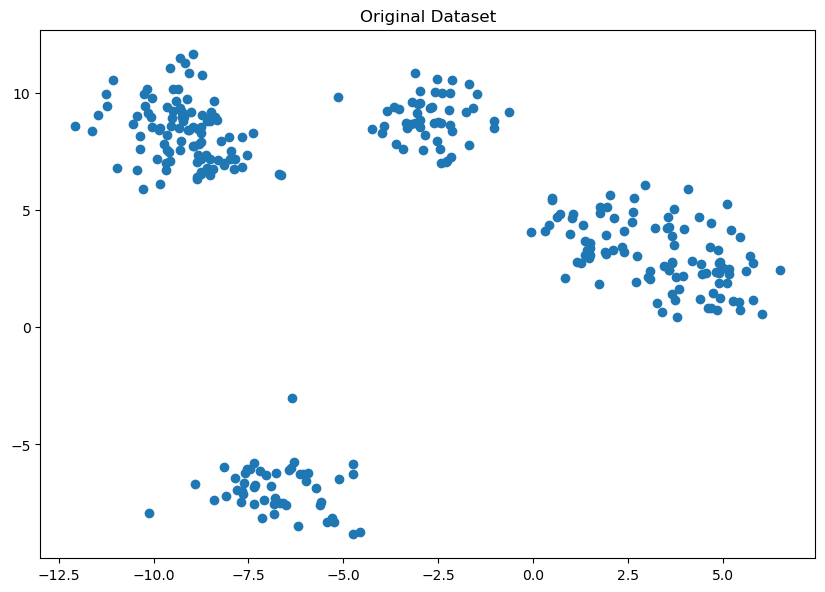

In [11]:
plt.figure(figsize=(10, 7), dpi=100)
plt.scatter(X[:,0], X[:,1])
plt.title('Original Dataset')


In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, centers=3, random_state=42)

1: 9862.490245314735
2: 2752.929084732387
3: 283.60067487251115
4: 242.3265662541843
5: 208.7833639996919
6: 180.55701179411219
7: 154.06393064552435
8: 136.6486287689576
9: 115.31663782506757
10: 104.47959636048387
11: 94.653003958175
12: 84.74590835048426
13: 75.2977221423138
14: 67.16852381433033
15: 61.1425399677768
16: 57.69911507610794
17: 50.90860467250317
18: 46.856812176636936
19: 43.826339952997614
20: 40.0925106465385
21: 36.35712107398684
22: 34.94238416018739
23: 32.68877576426054
24: 30.50807839151275
25: 29.408805514768474
26: 28.05581411132074
27: 26.911217222863016
28: 25.97167304806247
29: 24.31741566481513


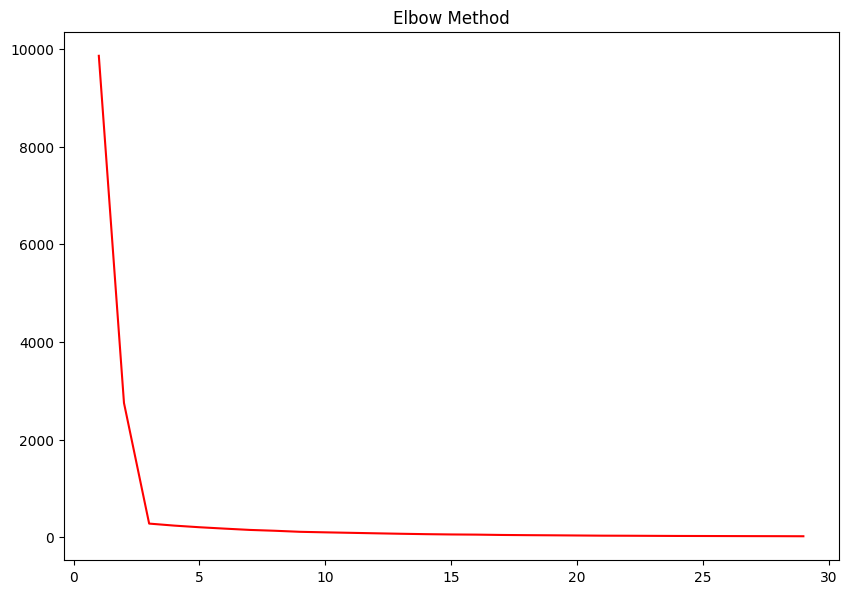

In [108]:
import seaborn as sns
from sklearn.cluster import KMeans
elbow=[]
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)
    print('{}: {}'.format(i, elbow[i-1]))
plt.figure(figsize=(10, 7), dpi=100)
sns.lineplot(range(1, 30), elbow,color='red')
plt.title('Elbow Method')
plt.show()

In [ ]:
# Compute the initial centroids randomly.
import random
K=6
# Create an empty centroid array.
centroids = np.array([]).reshape(0,n) #shape = (0,2)
# Create 3 random centroids.
for k in range(K):
    centroids = np.r_[centroids, X[random.randint(0,m-1)].reshape(1,2)] #randint(0,249)
    
    

def euclid_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

def plot(m,X,label,centroids):
    plt.figure(figsize=(10, 7), dpi=100)
    color = ['red','green','blue','black','orange','yellow']
    for i in range(m):
        plt.scatter(X[i,0],X[i,1], color = color[label[i]])
    for k in range(K):
        plt.scatter(centroids[k,0],centroids[k,1], color = "purple")
    plt.show()

    
for it in range(n_iter):
    label = []
    # Assign clusters to points.
    for i in range(m):
        distance = [euclid_distance(X[i],centroids[k]) for k in range(K)]
        min_index = np.argmin(distance)
        label.append(min_index)
    label = np.array(label)
    old_centroids = centroids.copy()
    # Compute mean and update.
    for k in range(K):
        k_index = np.where(label==k)[0]
        mean_centroid = np.mean(X[k_index],axis=0)
        centroids[k] = mean_centroid
    #plot graph in every 5 iterations
    if(it%4==0):
        plot(m,X,label,centroids)
    convergence = [np.abs(old_centroids-centroids) for k in range(K)]
    if(np.sum(convergence)<0.5):
        print(f"Converged in iteration {it}")
        plot(m,X,label,centroids)
        break
        
   # cost = np.sum([euclid_distance(X[i],centroid[label[i]]) for i in range(m)])/m     

        
import seaborn as sns
from sklearn.cluster import KMeans
elbow=[]
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)
    print('{}: {}'.format(i, elbow[i-1]))
plt.figure(figsize=(10, 7), dpi=100)
sns.lineplot(range(1, 30), elbow,color='red')
plt.title('Elbow Method')
plt.show()

